In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from zipfile import ZipFile

In [4]:
# !unzip "/content/drive/MyDrive/Capstone/Data/Microbusiness_Activity_index.zip" -d "/content/drive/MyDrive/Capstone/Microbusiness_Activity_Index"

In [5]:
# !unzip "/content/drive/MyDrive/Capstone/Data/Microbusiness_Density.zip" -d "/content/drive/MyDrive/Capstone/Microbusiness_Density"

In [6]:
# !unzip "/content/drive/MyDrive/Capstone/Data/Microbusiness_Industry&Commerce.zip" -d "/content/drive/MyDrive/Capstone/Microbusiness_Industry&Commerce"
# !unzip "/content/drive/MyDrive/Capstone/Data/Survey_Results.zip" -d "/content/drive/MyDrive/Capstone/Survey_Results"


# EDA [Microbusiness Activity Index data]




In [61]:
mai = pd.read_csv('/content/drive/MyDrive/Capstone/Microbusiness_Activity_Index/VF_mai_cbsas_Q222.csv') 
mai.head()

,date,cbsa,cbsa_name,total_pop_20,MAI_composite,engagement,participation,infrastructure
0,01apr2020,10100,"Aberdeen, SD",42864,103.02,114.54,96.11,103.52
1,01apr2020,10140,"Aberdeen, WA",73769,98.21,97.24,98.53,101.25
2,01apr2020,10180,"Abilene, TX",171354,98.82,97.75,99.40,100.30
3,01apr2020,10220,"Ada, OK",38385,98.61,98.90,99.84,96.63
4,01apr2020,10300,"Adrian, MI",98310,102.69,105.49,99.80,103.52


In [62]:
mai.tail()

,date,cbsa,cbsa_name,total_pop_20,MAI_composite,engagement,participation,infrastructure
25024,01jun2022,49660,"Youngstown-Warren-Boardman, OH-PA",538115,104.92,112.23,100.53,100.80
25025,01jun2022,49700,"Yuba City, CA",173839,100.41,102.16,98.30,103.74
25026,01jun2022,49740,"Yuma, AZ",211931,102.00,109.65,99.26,96.84
25027,01jun2022,49780,"Zanesville, OH",86033,104.75,116.01,98.97,99.65
25028,01jun2022,49820,"Zapata, TX",14243,96.30,109.33,99.14,75.56


In [51]:
mai.shape

(25029, 8)

In [63]:
mai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25029 entries, 0 to 25028
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            25029 non-null  object 
 1   cbsa            25029 non-null  int64  
 2   cbsa_name       25029 non-null  object 
 3   total_pop_20    25029 non-null  int64  
 4   MAI_composite   25029 non-null  float64
 5   engagement      25029 non-null  float64
 6   participation   25029 non-null  float64
 7   infrastructure  25029 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.5+ MB


In [66]:
mai[['City','State']] = mai.cbsa_name.str.split(",", expand = True)


In [67]:
mai

,date,cbsa,cbsa_name,total_pop_20,MAI_composite,engagement,participation,infrastructure,City,State
0,01apr2020,10100,"Aberdeen, SD",42864,103.02,114.54,96.11,103.52,Aberdeen,SD
1,01apr2020,10140,"Aberdeen, WA",73769,98.21,97.24,98.53,101.25,Aberdeen,WA
2,01apr2020,10180,"Abilene, TX",171354,98.82,97.75,99.40,100.30,Abilene,TX
3,01apr2020,10220,"Ada, OK",38385,98.61,98.90,99.84,96.63,Ada,OK
4,01apr2020,10300,"Adrian, MI",98310,102.69,105.49,99.80,103.52,Adrian,MI
...,...,...,...,...,...,...,...,...,...,...
25024,01jun2022,49660,"Youngstown-Warren-Boardman, OH-PA",538115,104.92,112.23,100.53,100.80,Youngstown-Warren-Boardman,OH-PA
25025,01jun2022,49700,"Yuba City, CA",173839,100.41,102.16,98.30,103.74,Yuba City,CA
25026,01jun2022,49740,"Yuma, AZ",211931,102.00,109.65,99.26,96.84,Yuma,AZ
25027,01jun2022,49780,"Zanesville, OH",86033,104.75,116.01,98.97,99.65,Zanesville,OH


In [68]:
mai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25029 entries, 0 to 25028
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            25029 non-null  object 
 1   cbsa            25029 non-null  int64  
 2   cbsa_name       25029 non-null  object 
 3   total_pop_20    25029 non-null  int64  
 4   MAI_composite   25029 non-null  float64
 5   engagement      25029 non-null  float64
 6   participation   25029 non-null  float64
 7   infrastructure  25029 non-null  float64
 8   City            25029 non-null  object 
 9   State           25029 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.9+ MB


In [70]:
mai.drop(['cbsa_name', 'cbsa'], axis=1)


,date,total_pop_20,MAI_composite,engagement,participation,infrastructure,City,State
0,01apr2020,42864,103.02,114.54,96.11,103.52,Aberdeen,SD
1,01apr2020,73769,98.21,97.24,98.53,101.25,Aberdeen,WA
2,01apr2020,171354,98.82,97.75,99.40,100.30,Abilene,TX
3,01apr2020,38385,98.61,98.90,99.84,96.63,Ada,OK
4,01apr2020,98310,102.69,105.49,99.80,103.52,Adrian,MI
...,...,...,...,...,...,...,...,...
25024,01jun2022,538115,104.92,112.23,100.53,100.80,Youngstown-Warren-Boardman,OH-PA
25025,01jun2022,173839,100.41,102.16,98.30,103.74,Yuba City,CA
25026,01jun2022,211931,102.00,109.65,99.26,96.84,Yuma,AZ
25027,01jun2022,86033,104.75,116.01,98.97,99.65,Zanesville,OH


Max and Min MAI_composite with respect to each state.

In [84]:
mai.groupby('State').MAI_composite.max().head(10)

State
 AK             113.50
 AL             111.82
 AL-GA          101.34
 AR             109.21
 AR-OK          106.64
 AZ             113.83
 CA             117.63
 CO             118.92
 CT             117.23
 DC-VA-MD-WV    116.24
Name: MAI_composite, dtype: float64

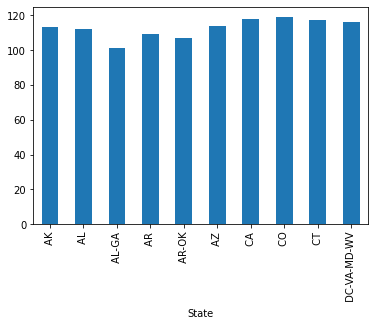

In [85]:
# top 10 states with lowest MAI_composite

mai.groupby('State').MAI_composite.max().head(10).plot(kind= 'bar')

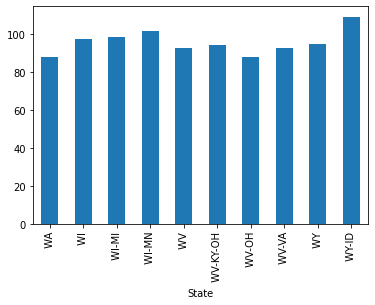

In [87]:
# top 10 states with lowest MAI_composite

mai.groupby('State').MAI_composite.min().tail(10).plot(kind= 'bar')

In [53]:
mai_natl = pd.read_csv('/content/drive/MyDrive/Capstone/Microbusiness_Activity_Index/VF_mai_national_Q222.csv')
mai_natl


,date,MAI_composite,engagement,participation,infrastructure
0,04/01/2020,100.00,100.00,100.00,100.00
1,05/01/2020,101.64,103.99,100.40,100.00
2,06/01/2020,101.18,102.03,100.65,100.00
3,07/01/2020,101.69,103.09,100.85,100.00
4,08/01/2020,101.88,103.64,100.87,100.00
5,09/01/2020,100.76,99.37,101.27,100.00
6,10/01/2020,101.39,104.38,99.91,100.00
7,11/01/2020,100.28,99.65,100.51,100.00
8,12/01/2020,99.85,98.36,100.52,100.00
9,01/01/2021,101.27,99.85,100.81,102.59


In [54]:
mai_natl.shape

(27, 5)

# EDA [Microbusiness Density]

In [17]:
den = pd.read_csv('/content/drive/MyDrive/Capstone/Microbusiness_Density/VF_md_cbsas_Q222.csv') 
den

,cbsa,city_name,micro_metro,total_pop_20,activeaug19,activesep19,activeoct19,activenov19,activedec19,activejan20,...,mdsep21,mdoct21,mdnov21,mddec21,mdjan22,mdfeb22,mdmar22,mdapr22,mdmay22,mdjun22
0,10100.0,"Aberdeen, SD",Micropolitan Statistical Area,42864.0,931,928,970,971,933,934,...,1.378673,1.449202,1.442485,1.439127,1.434653,1.438005,1.434653,1.541588,1.544946,1.325443
1,10140.0,"Aberdeen, WA",Micropolitan Statistical Area,73769.0,2282,2289,2308,2304,2287,2331,...,2.792293,2.815263,2.790858,2.726255,2.589748,2.585528,2.582714,3.034267,3.096163,2.932984
2,10180.0,"Abilene, TX",Metropolitan Statistical Area,171354.0,4846,4834,4855,4826,4838,5037,...,2.326110,2.319005,2.324216,2.319953,2.326080,2.354674,2.354674,2.553133,2.551703,2.186111
3,10220.0,"Ada, OK",Micropolitan Statistical Area,38385.0,1230,1216,1224,1223,1221,1237,...,1.879739,1.886759,1.895535,1.904311,1.924632,1.935178,1.922874,2.100397,2.109186,1.980877
4,10300.0,"Adrian, MI",Micropolitan Statistical Area,98310.0,5622,5792,5801,5799,5831,5852,...,4.543527,4.534382,4.548516,4.592579,4.562569,4.580694,4.589756,4.944842,4.971206,4.810552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,49740.0,"Yuma, AZ",Metropolitan Statistical Area,211931.0,3259,3297,3270,3287,3209,3273,...,1.436642,1.435216,1.432838,1.410011,1.411610,1.407848,1.405497,1.617097,1.625091,1.536219
936,49780.0,"Zanesville, OH",Micropolitan Statistical Area,86033.0,2012,2017,2025,2015,2001,2022,...,1.415098,1.418052,1.412144,1.385555,1.046385,1.022337,1.013948,1.126360,1.136427,0.994830
937,49820.0,"Zapata, TX",Micropolitan Statistical Area,14243.0,143,141,140,147,150,147,...,0.491260,0.498877,0.491260,0.460794,0.469836,0.442198,0.446147,0.568541,0.578490,0.531266
938,99999.0,NaN,NaN,NaN,705199,703947,708763,707287,707666,703637,...,2.683353,2.688692,2.698122,2.700754,2.645852,2.656391,2.648942,2.959091,2.978035,2.771649


In [18]:
den.tail()

,cbsa,city_name,micro_metro,total_pop_20,activeaug19,activesep19,activeoct19,activenov19,activedec19,activejan20,...,mdsep21,mdoct21,mdnov21,mddec21,mdjan22,mdfeb22,mdmar22,mdapr22,mdmay22,mdjun22
935,49740.0,"Yuma, AZ",Metropolitan Statistical Area,211931.0,3259,3297,3270,3287,3209,3273,...,1.436642,1.435216,1.432838,1.410011,1.411610,1.407848,1.405497,1.617097,1.625091,1.536219
936,49780.0,"Zanesville, OH",Micropolitan Statistical Area,86033.0,2012,2017,2025,2015,2001,2022,...,1.415098,1.418052,1.412144,1.385555,1.046385,1.022337,1.013948,1.126360,1.136427,0.994830
937,49820.0,"Zapata, TX",Micropolitan Statistical Area,14243.0,143,141,140,147,150,147,...,0.491260,0.498877,0.491260,0.460794,0.469836,0.442198,0.446147,0.568541,0.578490,0.531266
938,99999.0,NaN,NaN,NaN,705199,703947,708763,707287,707666,703637,...,2.683353,2.688692,2.698122,2.700754,2.645852,2.656391,2.648942,2.959091,2.978035,2.771649
939,NaN,NaN,NaN,NaN,175,174,183,184,180,184,...,0.163392,0.159034,0.159034,0.159034,0.202567,0.204744,0.207610,NaN,NaN,NaN


In [19]:
den.columns

Index(['cbsa', 'city_name', 'micro_metro', 'total_pop_20', 'activeaug19',
       'activesep19', 'activeoct19', 'activenov19', 'activedec19',
       'activejan20', 'activefeb20', 'activemar20', 'activeapr20',
       'activemay20', 'activejun20', 'activejul20', 'activeaug20',
       'activesep20', 'activeoct20', 'activenov20', 'activedec20',
       'activejan21', 'activefeb21', 'activemar21', 'activeapr21',
       'activemay21', 'activejun21', 'activejul21', 'activeaug21',
       'activesep21', 'activeoct21', 'activenov21', 'activedec21',
       'activejan22', 'activefeb22', 'activemar22', 'activeapr22',
       'activemay22', 'activejun22', 'mdaug19', 'mdsep19', 'mdoct19',
       'mdnov19', 'mddec19', 'mdjan20', 'mdfeb20', 'mdmar20', 'mdapr20',
       'mdmay20', 'mdjun20', 'mdjul20', 'mdaug20', 'mdsep20', 'mdoct20',
       'mdnov20', 'mddec20', 'mdjan21', 'mdfeb21', 'mdmar21', 'mdapr21',
       'mdmay21', 'mdjun21', 'mdjul21', 'mdaug21', 'mdsep21', 'mdoct21',
       'mdnov21', 'mddec21',

In [20]:
den.isna().sum()

cbsa             1
city_name        2
micro_metro      2
total_pop_20    14
activeaug19      0
                ..
mdfeb22          0
mdmar22          0
mdapr22          1
mdmay22          1
mdjun22          1
Length: 74, dtype: int64

In [55]:
den.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 74 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cbsa          939 non-null    float64
 1   city_name     938 non-null    object 
 2   micro_metro   938 non-null    object 
 3   total_pop_20  926 non-null    float64
 4   activeaug19   940 non-null    int64  
 5   activesep19   940 non-null    int64  
 6   activeoct19   940 non-null    int64  
 7   activenov19   940 non-null    int64  
 8   activedec19   940 non-null    int64  
 9   activejan20   940 non-null    int64  
 10  activefeb20   940 non-null    int64  
 11  activemar20   940 non-null    int64  
 12  activeapr20   940 non-null    int64  
 13  activemay20   940 non-null    int64  
 14  activejun20   940 non-null    int64  
 15  activejul20   940 non-null    int64  
 16  activeaug20   940 non-null    int64  
 17  activesep20   940 non-null    int64  
 18  activeoct20   940 non-null    

In [56]:
den.describe()

,cbsa,total_pop_20,activeaug19,activesep19,activeoct19,activenov19,activedec19,activejan20,activefeb20,activemar20,...,mdsep21,mdoct21,mdnov21,mddec21,mdjan22,mdfeb22,mdmar22,mdapr22,mdmay22,mdjun22
count,939.000000,9.260000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,9.400000e+02,...,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,939.000000,939.000000,939.000000
mean,29895.064963,3.330401e+05,2.296960e+04,2.308822e+04,2.318772e+04,2.315090e+04,2.313438e+04,2.318771e+04,2.285906e+04,2.317155e+04,...,3.121888,3.140512,3.148566,3.378730,3.351533,3.367535,3.362875,3.399187,3.425567,3.244845
std,11605.918661,1.101823e+06,1.021193e+05,1.024764e+05,1.032961e+05,1.032406e+05,1.031907e+05,1.034528e+05,1.019670e+05,1.035678e+05,...,3.424973,3.509007,3.564555,6.665593,6.823097,6.887287,6.897337,3.185708,3.260102,2.856051
min,10100.000000,1.271700e+04,9.000000e+00,1.000000e+01,1.300000e+01,1.100000e+01,1.100000e+01,1.100000e+01,1.200000e+01,1.100000e+01,...,0.076613,0.070182,0.061409,0.061409,0.053102,0.053102,0.061952,0.115054,0.115054,0.118627
25%,20040.000000,3.951350e+04,1.133500e+03,1.139000e+03,1.141750e+03,1.136500e+03,1.134500e+03,1.135500e+03,1.119750e+03,1.133250e+03,...,1.615592,1.613338,1.612589,1.610601,1.586739,1.579160,1.570371,1.818149,1.820218,1.656940
50%,29820.000000,7.457600e+04,2.936000e+03,2.945000e+03,2.959500e+03,2.956000e+03,2.942000e+03,2.952500e+03,2.917000e+03,2.950500e+03,...,2.337697,2.330953,2.339319,2.338348,2.301032,2.317308,2.312447,2.618731,2.635715,2.460601
75%,39680.000000,1.851492e+05,8.961250e+03,9.025250e+03,9.027000e+03,8.976250e+03,8.944000e+03,8.898250e+03,8.758000e+03,8.852750e+03,...,3.605434,3.647157,3.610409,3.594049,3.502757,3.499744,3.499903,3.894328,3.920298,3.922050
max,99999.000000,1.926157e+07,1.628167e+06,1.632755e+06,1.640978e+06,1.640051e+06,1.633661e+06,1.636460e+06,1.617162e+06,1.637292e+06,...,68.259155,71.251358,72.592407,161.279680,165.294910,166.081330,166.141330,41.027290,43.543045,35.153145


# EDA [Microbusiness Industry & Commerce]

In [38]:
indcom = pd.read_csv('/content/drive/MyDrive/Capstone/Microbusiness_Industry&Commerce/VF_indcom_cbsa_Q222.csv')
indcom

,cbsa,city_name,groupflag,total_pop_20,orders_rank_aug19,orders_rank_sep19,orders_rank_oct19,orders_rank_nov19,orders_rank_dec19,orders_rank_jan20,...,avg_traffic_oct21,avg_traffic_nov21,avg_traffic_dec21,avg_traffic_jan22,avg_traffic_feb22,avg_traffic_mar22,avg_traffic_apr22,avg_traffic_may22,avg_traffic_jun22,avg_lifespan_mths
0,10100,"Aberdeen, SD",Micropolitans,42864,197.0,231.0,293.0,236.0,216.0,237.0,...,134.0,118.1,102.3,115.1,110.2,468.8,884.2,171.8,133.3,15.1
1,10140,"Aberdeen, WA",Middle Metros,73769,136.0,139.0,156.0,341.0,367.0,449.0,...,85.5,76.9,76.7,87.7,86.1,100.0,105.9,126.9,126.5,13.1
2,10180,"Abilene, TX",Middle Metros,171354,158.0,198.0,158.0,304.0,312.0,212.0,...,108.8,101.2,86.6,87.4,76.8,97.1,101.0,112.3,94.1,13.9
3,10220,"Ada, OK",Micropolitans,38385,254.0,NaN,277.0,NaN,269.0,NaN,...,78.3,77.0,75.7,98.7,68.1,87.7,93.7,105.6,98.3,13.8
4,10300,"Adrian, MI",Middle Metros,98310,251.0,177.0,307.0,174.0,258.0,268.0,...,162.1,116.4,135.8,155.4,141.7,131.9,132.2,153.0,150.4,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,49660,"Youngstown-Warren-Boardman, OH-PA",Middle Metros,538115,241.0,224.0,290.0,280.0,253.0,309.0,...,134.8,131.4,137.1,143.2,144.9,155.9,153.2,155.7,148.9,14.2
922,49700,"Yuba City, CA",Middle Metros,173839,431.0,412.0,375.0,225.0,377.0,431.0,...,384.5,225.6,205.9,241.8,332.3,318.5,354.0,235.2,209.9,13.0
923,49740,"Yuma, AZ",Middle Metros,211931,473.0,476.0,478.0,478.0,480.0,465.0,...,166.1,115.2,128.4,152.4,136.4,135.0,124.2,117.5,112.4,13.4
924,49780,"Zanesville, OH",Middle Metros,86033,450.0,424.0,360.0,322.0,437.0,398.0,...,118.9,88.4,99.7,89.1,96.2,106.3,112.1,106.1,146.2,13.9


In [39]:
indcom.columns

Index(['cbsa', 'city_name', 'groupflag', 'total_pop_20', 'orders_rank_aug19',
       'orders_rank_sep19', 'orders_rank_oct19', 'orders_rank_nov19',
       'orders_rank_dec19', 'orders_rank_jan20',
       ...
       'avg_traffic_oct21', 'avg_traffic_nov21', 'avg_traffic_dec21',
       'avg_traffic_jan22', 'avg_traffic_feb22', 'avg_traffic_mar22',
       'avg_traffic_apr22', 'avg_traffic_may22', 'avg_traffic_jun22',
       'avg_lifespan_mths'],
      dtype='object', length=180)

In [40]:
den.isna().sum()

cbsa             1
city_name        2
micro_metro      2
total_pop_20    14
activeaug19      0
                ..
mdfeb22          0
mdmar22          0
mdapr22          1
mdmay22          1
mdjun22          1
Length: 74, dtype: int64

# EDA [Survey Results]

In [30]:
survey = pd.read_csv('/content/drive/MyDrive/Capstone/Survey_Results/vf_survey_data_Q222.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17,20,21,22,27,29,30,31,32,33,34,45,51,52,53,78,85,94,95,97,98,99,100,101,102,103,104,105,106,107,108,135,136,137,138,139,140,141,142,143,145,146,147,189,190,249,250,261,271,296,307,328) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
survey

,survey_id,city,state,year,month,gender,woman_owned,black_owned,latino_owned,foreign_born_owned,...,cust_state,cust_usa,cust_intl,cust_notsure,collegedegree_flag,under10_employees,post2020launch,hrs_over40wk,under5k_launch,national_scale
0,24,Boise,Idaho,2021,June,Female,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,NaN,1.0,NaN,1.0,0.0
1,96,Boise,Idaho,2021,June,Male,0.0,NaN,NaN,NaN,...,1.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN,0.0,0.0
2,116,Boise,Idaho,2021,June,Male,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0
3,162,Boise,Idaho,2021,June,Female,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0
4,190,Boise,Idaho,2021,June,Male,0.0,NaN,NaN,NaN,...,1.0,1.0,0.0,NaN,0.0,NaN,1.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21708,5521,National,National,2022,Aug,Male,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0
21709,5522,National,National,2022,Aug,Female,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,0.0
21710,5523,National,National,2022,Aug,Prefer not to answer,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0
21711,5528,National,National,2022,Aug,Female,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN


In [32]:
survey.head()

,survey_id,city,state,year,month,gender,woman_owned,black_owned,latino_owned,foreign_born_owned,...,cust_state,cust_usa,cust_intl,cust_notsure,collegedegree_flag,under10_employees,post2020launch,hrs_over40wk,under5k_launch,national_scale
0,24,Boise,Idaho,2021,June,Female,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,NaN,1.0,NaN,1.0,0.0
1,96,Boise,Idaho,2021,June,Male,0.0,NaN,NaN,NaN,...,1.0,0.0,0.0,NaN,1.0,NaN,1.0,NaN,0.0,0.0
2,116,Boise,Idaho,2021,June,Male,0.0,NaN,NaN,NaN,...,0.0,1.0,0.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0
3,162,Boise,Idaho,2021,June,Female,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,NaN,1.0,NaN,0.0,0.0
4,190,Boise,Idaho,2021,June,Male,0.0,NaN,NaN,NaN,...,1.0,1.0,0.0,NaN,0.0,NaN,1.0,NaN,1.0,0.0


In [33]:
survey.tail()

,survey_id,city,state,year,month,gender,woman_owned,black_owned,latino_owned,foreign_born_owned,...,cust_state,cust_usa,cust_intl,cust_notsure,collegedegree_flag,under10_employees,post2020launch,hrs_over40wk,under5k_launch,national_scale
21708,5521,National,National,2022,Aug,Male,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0
21709,5522,National,National,2022,Aug,Female,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,0.0
21710,5523,National,National,2022,Aug,Prefer not to answer,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,1.0,1.0
21711,5528,National,National,2022,Aug,Female,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN
21712,5529,National,National,2022,Aug,Female,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0


In [34]:
survey.columns

Index(['survey_id', 'city', 'state', 'year', 'month', 'gender', 'woman_owned',
       'black_owned', 'latino_owned', 'foreign_born_owned',
       ...
       'cust_state', 'cust_usa', 'cust_intl', 'cust_notsure',
       'collegedegree_flag', 'under10_employees', 'post2020launch',
       'hrs_over40wk', 'under5k_launch', 'national_scale'],
      dtype='object', length=379)

In [35]:
survey.shape

(21713, 379)

In [36]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21713 entries, 0 to 21712
Columns: 379 entries, survey_id to national_scale
dtypes: float64(312), int64(2), object(65)
memory usage: 62.8+ MB
